# Умножение больших целых чисел
**Область применения:** современная криптология, в которой требуется работать с целыми числами, длина которых превышает 100 десятичных цифр  

## Частный случай
При умножении в столбик каждая из $n$ цифр первого числа умножается на $n$ цифр второго числа, следовательно всего $n^2$ умножений. Метод декомпозиции позволяет сократить количество умножений и увеличить скорость подсчета.  
$23 * 14 = (2 * 10^1 + 3 * 10^0) * (1 * 10^1 + 4 * 10^0) = (2*1)*10^2 + (2*4+3*1)*10^1 + (3*4)*10^0$
Разложив множители на сумму произведений, мы получили, что и само произведение представимо в виде суммы. Чтобы сократить число умножений цифр (при обычно методе их было бы $2*2=4$, и здесь их тоже $4$), нужно обратить внимание на *средний член* в получившейся сумме:  
$(2*4 + 3*1) = (2+3)*(1+4)-2*1-3*4$  
В силу того, что нам известны $2*1$ и $3*4$, мы можем воспользоваться этим знанием и заменить умножения в среднем члене на разность

Таким образом: *для любых двухзначных чисел $a = a_1a_0, b=b_1b_0$ справедливо:*  
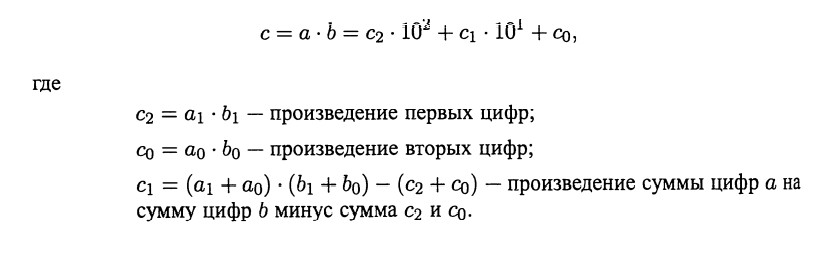

## Общий случай
Рассмотрим теперь произведение $n$-значных цифр $a$ и $b$.  
Разделим числа пополам по цифрам: $a = a_1a_0=a_1*10^{n/2}+a_0$ и аналогично с $b$.  
*Пример: $6457=64*10^{4/2}+57$*  
Тогда: 
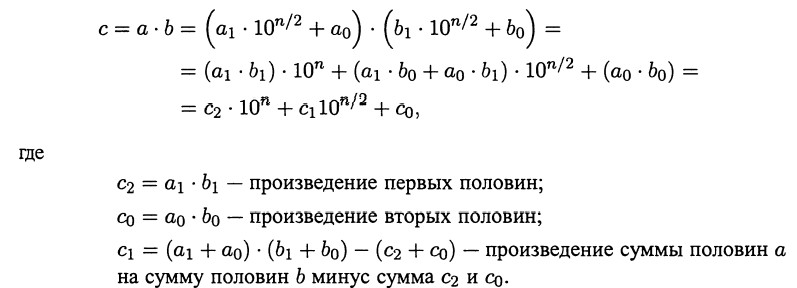
Если $n/2$ четно, то к $c_0, c_1, c_2$ можно применить тот же алгоритм. Таким образом, если $n$ представляет собой степень $2$-ки, то получим рекурсивный алгоритм для вычисления произведения двух $n$-значных целых чисел

In [24]:
def prod_two_numbers(num1, num2):
    n = len(num1)
    if n <= 3:
        return int(num1)*int(num2)
    else:
        a1, b1 = num1[:n//2], num2[:n//2]
        a0, b0 = num1[n//2:], num2[n//2:]
        c2 = prod_two_numbers(a1, b1)
        c0 = prod_two_numbers(a0, b0)
        tmp1 = str(int(a1)+int(a0))
        tmp2 = str(int(b1)+int(b0))
        c1 = prod_two_numbers(tmp1, tmp2) - c0 - c2
        return c2*10**n + c1*10**(n/2) + c0

In [25]:
print(prod_two_numbers('1610160912344321','1615141312845577'))

2.6006374098564386e+30
